In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
import scipy

In [22]:
!pip install statsmodels

## Simple Linear regression example

In [49]:
num_points = 10
x_vals = np.linspace(0,10, num_points)
y_vals = pkl.load(open('../pkl/y_vals.pkl', 'rb'))

<div dir="rtl"> להלן סדרת נתונים. נרצה לחזות הכנסה באלפי שקלים כפונקצייה של שנות לימוד במוסד השכלה גבוהה. 

<div dir="rtl"> יהי הסדרה $x_1,x_2,...,x_n$ נתונים שמבטאים את מספר שנות לימוד

<div dir="rtl"> יהי הסדרה $y_1,y_2,...,y_n$ נתונים שמבטאים את המשכורת באלפי שקלים

In [50]:
df_data = pd.DataFrame(np.append(x_vals.reshape( x_vals.shape[0],1), y_vals.reshape( x_vals.shape[0],1), axis = 1), columns = ['years', 'salary'])
df_data.head()

,years,salary
0,0.000000,9.822764
1,1.111111,13.754365
2,2.222222,14.202024
3,3.333333,17.572397
4,4.444444,19.848316


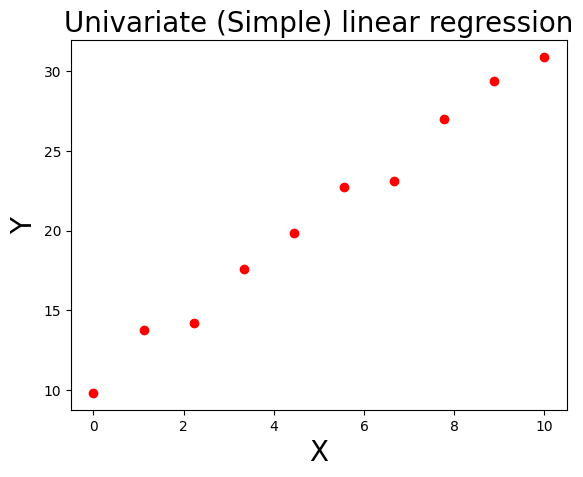

In [51]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl"> משוואת חיזוי רגרסיה ליניארית:
$$ \hat{Y_i} = b_0 + b_1 x_i $$

<div dir="rtl">    $\hat{Y_i}$: הערך החזוי

<div dir="rtl">    $x_i$: המשתנה התלוי

<div dir="rtl">    $b_0$: חותך של המשוואה הליניארית

<div dir="rtl">    $b_1$: השיפוע של המשוואה הליניארית

<div dir="rtl"> נרצה למצוא קו ישר הכי קרוב לשאר הנקודות

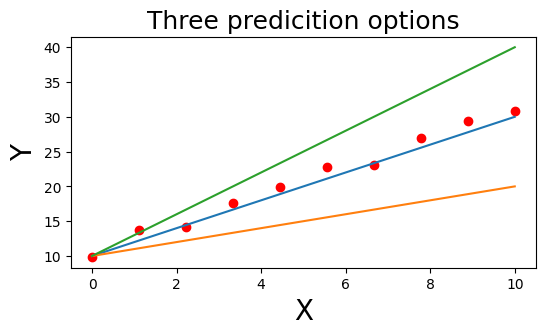

In [52]:
plt.figure(figsize=(6,3))
plt.scatter(x_vals, y_vals, color = 'r')
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Three predicition options', fontsize = 18)
plt.plot(x_vals, 10 + 2*x_vals)
plt.plot(x_vals, 10 + 1*x_vals)
plt.plot(x_vals, 10 + 3*x_vals)
plt.show()

<div dir="rtl"> אם $y_i$ זו הנקודה הנצפית ו$\hat{y_i}$ זו התחזית השגיאה היא: $y_i - \hat{y_i}$
    
<div dir="rtl">
מה שנהוג היום זה למצוא את הקו הישר ששמזער את סכום ריבועי השגיאות:

$$ min_{b_0,b_1}:  \sum_{i=1}^n (\hat{y}_i-y_i)^2 =  \sum_{i=1}^n (b_0+b_1 x_i-y_i )^2 $$

<div dir="rtl">
קו ישר מוגדר על ידי החותך והשיפוע, כלומר $b_0$  ו - $b_1$. אנחנו רוצים למצוא את הערכים האופטימליים שלהם.

<div dir="rtl">        
למעשה יש פתרון פשוט לבעיה הזאת. כדי למצוא את את $b_0$ ו $b_1$ שממזערים את המשוואה למעלה רק צריך לגזור ולהשוות ל-0

<div dir="rtl"> מה שמקבלים זה:

$$ b_1 = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y_i})}{\sum_{i=1}^n(x-\bar{x})^2} $$

$$ b_0 = \bar{y} -b_1\bar{x} $$

<div dir="rtl">
כאשר $\bar{x}$ הוא הממוצע של סדרת הxים. כלומר:

$$ \bar{x} = \sum_{i=1}^n x_i $$

<div dir="rtl">
כאשר $\bar{y}$ הוא הממוצע של סדרת הyים. כלומר:

$$ \bar{y} = \sum_{i=1}^n y_i $$

<div dir="rtl"> אבל במקום להציג בנוסחאות אנחנו נשתמש בחבילה שתעשה את זה בשבילנו

<div dir="rtl"> כדי לחשב את הפרמטרים $b_0$ ו$b_1$ אנחנו צריכים להשתמש בחבילה מיועדת. שם החבילה הוא statmodels. 

<div dir="rtl"> יש דבר אחד שהוא לא כלכך טבעי באופן שמשתמשים בחבילה.  אנחנו יודעים שהנתונים נראים כך: 

In [53]:
df_data.head()

,years,salary
0,0.000000,9.822764
1,1.111111,13.754365
2,2.222222,14.202024
3,3.333333,17.572397
4,4.444444,19.848316


<div dir="rtl"> אבל כדי להשתמש בחבילה הנתונים צריכים להיראות כך:

In [54]:
x_vals1 = sm.add_constant(x_vals)
df_data1 = pd.DataFrame(np.append(x_vals1, y_vals.reshape( x_vals.shape[0],1), axis = 1), columns = ['intercept' ,'years', 'salary'])
df_data1.head()

,intercept,years,salary
0,1.0,0.000000,9.822764
1,1.0,1.111111,13.754365
2,1.0,2.222222,14.202024
3,1.0,3.333333,17.572397
4,1.0,4.444444,19.848316


<div dir="rtl"> כלומר הוספנו עמודה בשם intercept וכל הערכים שם שווים 1.

<div dir="rtl"> שימו לב שהוספת האחרות יכולה להתבצע בעזרת החבילה statmodels על ידי: 

x_vals1 = sm.add_constant(x_vals)

<div dir="rtl"> יש פה משהו מוזר. הכנסנו באופן מלאכותי עמודה של אחדות לנתונים. הדבר הזה נועד לסמן למודל שיש חותך. אחרת זה יקבע   שהערך של $b_0$ הוא 0. מאחורי הקלעים יש הגיון מתמטי אבל כדי להבין אותו הוא דורש פורמלציה מורכבת של הבעיה ולא ניכנס אליה.  עכשיו נראה איך מזינים את הכל למודל:

### Using Statmodels

In [55]:
# Create a linear regression model
model = sm.OLS(df_data1['salary'], df_data1[['intercept', 'years']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     751.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           3.39e-09
Time:                        09:47:14   Log-Likelihood:                -10.436
No. Observations:                  10   AIC:                             24.87
Df Residuals:                       8   BIC:                             25.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.4003      0.451     23.036      0.0

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<div dir="rtl"> למעלה יש פלט עם הרבה הגדרות מוזרות ולא ברורות. מעניין אותנו שני דברים בפלט. 
    <br>
1. את ערכי הפרמטרים $b_0$ ו-$b_1$.
    <br>
2. מדד שמתאר עד כמה המודל טוב.

<div dir="rtl"> נתחיל עם ערכי הפרמטרים. אנחנו רוצים לדעת מהו $b_0$ כלומר החותך (באנגלית Intercept) ורוצים לדעת את השיפוע $b_1$ במקרה שלנו years.

<div dir="rtl">
הערכים של הפרמטרים הם תחת העמודה coef (מגיע מהמילה coefficient). 
במקרה שלנו זה :

$$ b_0 = 10.4003 $$

$$ b_1 =  2.086 $$ 



## Predictions

<div dir="rtl"> כל מטרת הרגרסיה היא לעשות תחזית, השאלה היא איך עושים את בעזרת statmodels. נניח אנחנו רוצים לדעת מה תהיה המשכורת עבור 10 שנות לימוד. עושים זאת כך. קודם כל מכינים את הinput של המודל:

In [56]:
inp = np.array([[1,10]])

<div dir="rtl"> כדי לעשות תחזית צריך להשתמש בפונקציית predict עבור האובייקט של המודל results:

In [57]:
pred = results.predict(inp)
pred

array([31.26049082])

<div dir="rtl">  בואו נראה איך המודל הלינארי נראה:

## Plotting the graph

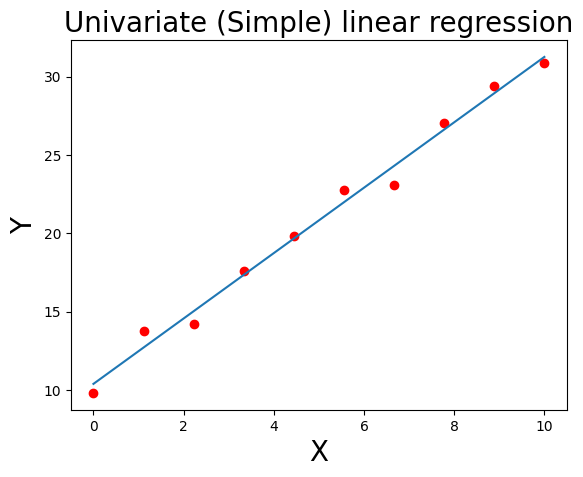

In [58]:
plt.figure()
plt.scatter(x_vals, y_vals, color = 'r')
plt.plot(x_vals, results.predict(x_vals1))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl"> 
משוואת הרגרסיה כאמור היא:
$$ \hat{Y_i} = b_0 + b_1 x_i $$

### חישוב ידני של  $b_0$ ו $b_1$.

$$ b_1 = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y_i})}{\sum_{i=1}^n(x-\bar{x})^2} $$

$$ b_0 = \bar{y} -b_1\bar{x} $$

In [59]:
X = x_vals
Y = y_vals

# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate the slope (beta1)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X) ** 2)
beta1 = numerator / denominator

# Calculate the intercept (beta0)
beta0 = mean_Y - beta1 * mean_X

print("Slope (beta1):", beta1)
print("Intercept (beta0):", beta0)

Slope (beta1): 2.0860169201878462
Intercept (beta0): 10.400321620196515


<div dir="rtl"> 
    
### איך אנחנו יודעים אם המודל שלנו טוב?


In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     751.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           3.39e-09
Time:                        09:47:23   Log-Likelihood:                -10.436
No. Observations:                  10   AIC:                             24.87
Df Residuals:                       8   BIC:                             25.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.4003      0.451     23.036      0.0

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<div dir="rtl">   כעת מעניין אותנו לבדוק האם המודל הליניארי שלנו טוב. כאשר אנחנו משתמשים במודל סטטיסטי אין באמת הבטחה שהמודל שלנו טוב. אנחנו צריכים לחשוב על מדד שיבדוק כמה המודל טוב. במודל רגרסיה ליניארית משתמשים במודל שנקרא $R^2$. 

## $$R^2 = \frac{SST-SSR}{SST}$$
where 

$$SSR = \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
 and,

 $$SST= \sum_{i=1}^{n}(y_i-\bar{y})^2$$

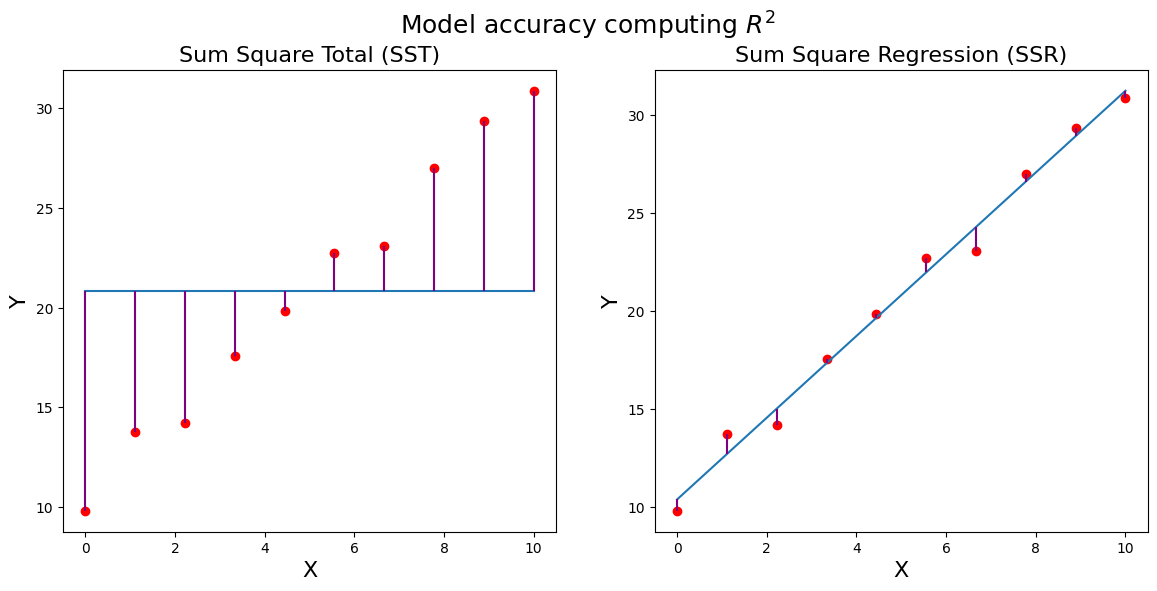

In [61]:
fontsize = 16
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Model accuracy computing $R^2$', fontsize = fontsize+2)
ax1.scatter(x_vals, y_vals, color = 'r')
ax1.plot(x_vals, np.ones(y_vals.shape[0])*y_vals.mean())

# single line
ax1.vlines(x = x_vals, ymin = y_vals, ymax = np.ones(y_vals.shape[0])*y_vals.mean(),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax1.set_xlabel('X', fontsize = fontsize)
ax1.set_ylabel('Y', fontsize = fontsize)
ax1.set_title('Sum Square Total (SST)', fontsize = fontsize)


ax2.scatter(x_vals, y_vals, color = 'r')
ax2.plot(x_vals, results.predict(x_vals1))
ax2.vlines(x = x_vals, ymin = y_vals, ymax = results.predict(x_vals1),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax2.set_xlabel('X', fontsize = fontsize)
ax2.set_ylabel('Y', fontsize = fontsize)

# plt.xlabel('X', fontsize = 20)
# plt.ylabel('Y', fontsize = 20)
ax2.set_title('Sum Square Regression (SSR)', fontsize = fontsize)
plt.show()

<div dir="rtl"> בדוגמא הזאת $R^2 = 0.989$. המדד הזה מקבל ערך בין 0 ל-1 כאשר כמה שיותר קרוב ל-1 ככה יותר טוב.


<div dir="rtl">  המשמעות של $R^2=0.989$ זה שהמשתנה המסביר יכול להסביר $98.9\%$  מהשונות של המשנה המוסבר.

<div dir="rtl"> אם נדייק המדד הזה מציין עד כמה הקו הישר שמתחנו מתאים טוב לנתונים. באנגלית נשתמש במונח goodness of fit.

<div dir="rtl"> 
### דוגמא התאמת המודל לנתונים אינה טובה:

In [62]:
num_points = 80
x_vals_bad_example = np.linspace(0,10, num_points)
y_vals_bad_exmaple =  pkl.load( open('../pkl/y_vals_bad_exmaple.pkl', 'rb'))

In [63]:
# Assuming X_train and y_train are your training data
x_vals1_bad_example = sm.add_constant(x_vals_bad_example)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model1 = sm.OLS(y_vals_bad_exmaple, x_vals1_bad_example)
# Fit the model
results1 = model1.fit()
# Print summary statistics, including p-values for each coefficient
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     45.67
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           2.27e-09
Time:                        09:47:37   Log-Likelihood:                -91.985
No. Observations:                  80   AIC:                             188.0
Df Residuals:                      78   BIC:                             192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3544      0.171     48.739      0.0

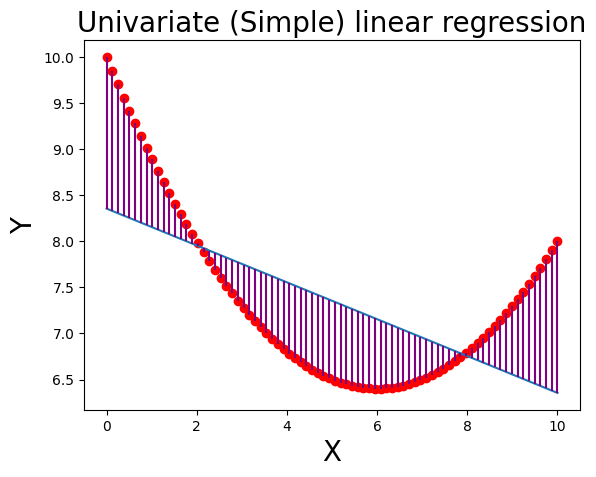

In [64]:
plt.figure()
plt.scatter(x_vals_bad_example, y_vals_bad_exmaple, color = 'r')
plt.plot(x_vals_bad_example, results1.predict(x_vals1_bad_example))
plt.vlines(x = x_vals_bad_example, ymin = y_vals_bad_exmaple, ymax = results1.predict(x_vals1_bad_example),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

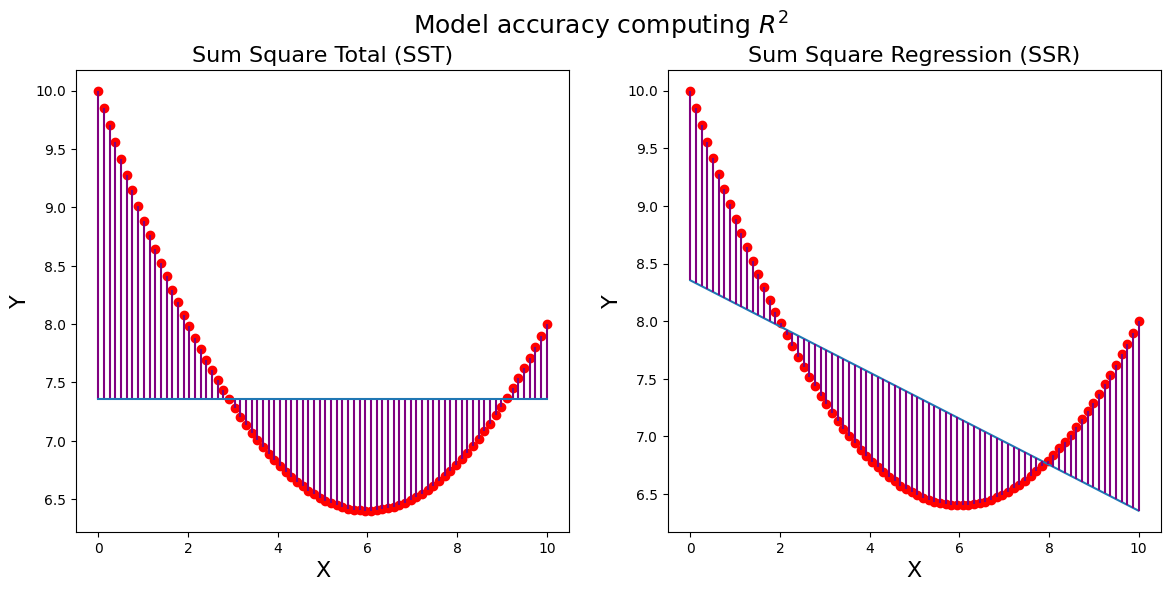

In [65]:
fontsize = 16
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Model accuracy computing $R^2$', fontsize = fontsize+2)



ax1.vlines(x = x_vals_bad_example, ymin = y_vals_bad_exmaple, ymax = np.ones(y_vals_bad_exmaple.shape[0])*y_vals_bad_exmaple.mean(),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax1.set_xlabel('X', fontsize = fontsize)
ax1.set_ylabel('Y', fontsize = fontsize)
ax1.set_title('Sum Square Total (SST)', fontsize = fontsize)
ax1.scatter(x_vals_bad_example, y_vals_bad_exmaple, color = 'r')
ax1.plot(x_vals_bad_example, np.ones(y_vals_bad_exmaple.shape[0])*y_vals_bad_exmaple.mean())


ax2.scatter(x_vals_bad_example, y_vals_bad_exmaple, color = 'r')
ax2.plot(x_vals, results1.predict(x_vals1))
ax2.vlines(x = x_vals_bad_example, ymin = y_vals_bad_exmaple, ymax = results1.predict(x_vals1_bad_example),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax2.set_xlabel('X', fontsize = fontsize)
ax2.set_ylabel('Y', fontsize = fontsize)
ax1.set_title('Sum Square Total (SST)', fontsize = fontsize)


ax2.set_title('Sum Square Regression (SSR)', fontsize = fontsize)
plt.show()

<div dir="rtl">  ה$R^2$ הפעם שווה ל 0.369. לפי הגרפים למעלה ניתן לראות למה אנחנו מקבלים ערך כלכך נמוך.

<div dir="rtl">  ברמה הכללית קשה להגיד מראש מהו $R^2$ ומהו לא. כמובן 1-1 זה טוב ו-0 זה לא, אבל מה לגבי 0.8? או 0.4? מסתבר שזה תלוי בעולם התוכן שבו אנחנו נמצאים. למשל בעולמות של רפואה 0.4 נכנס לגבוה באילו בהנדסה 0.7 נחשב לנמוך.

<div dir="rtl"> 

## הנחות המודל

<div dir="rtl"> 

### 1. ליניאריות

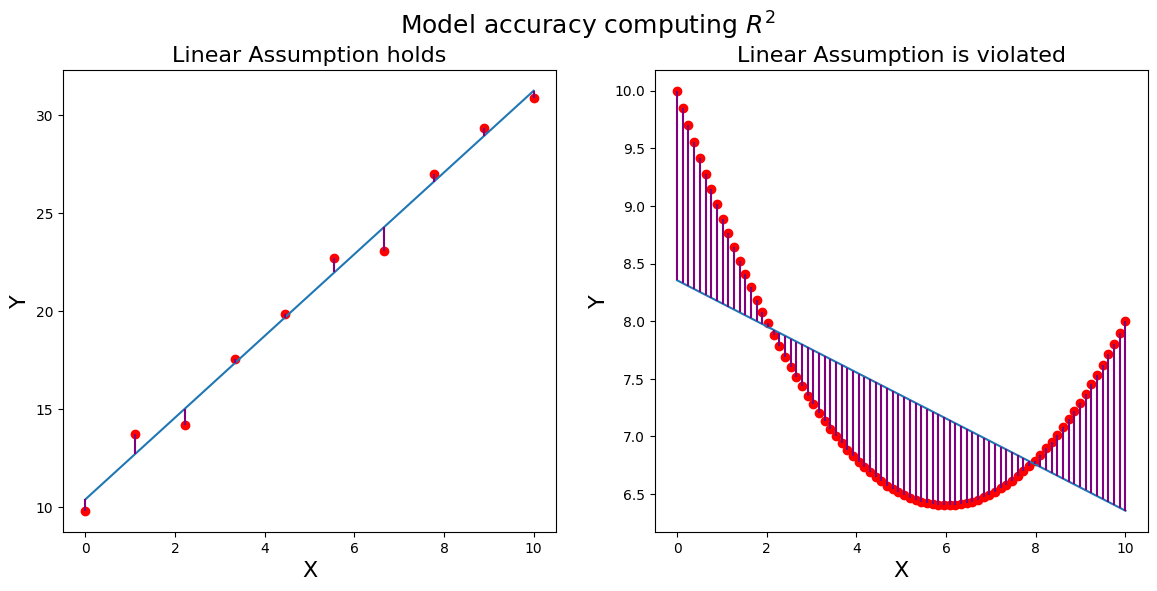

In [66]:
fontsize = 16
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Model accuracy computing $R^2$', fontsize = fontsize+2)


ax1.scatter(x_vals, y_vals, color = 'r')
ax1.plot(x_vals, results.predict(x_vals1))
ax1.vlines(x = x_vals, ymin = y_vals, ymax = results.predict(x_vals1),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax1.set_xlabel('X', fontsize = fontsize)
ax1.set_ylabel('Y', fontsize = fontsize)
ax1.set_title('Linear Assumption holds', fontsize = fontsize)

ax2.scatter(x_vals_bad_example, y_vals_bad_exmaple, color = 'r')
ax2.plot(x_vals_bad_example, results1.predict(x_vals1_bad_example))
ax2.vlines(x = x_vals_bad_example, ymin = y_vals_bad_exmaple, ymax = results1.predict(x_vals1_bad_example),
           colors = 'purple',
           label = 'vline_multiple - full height')
ax2.set_xlabel('X', fontsize = fontsize)
ax2.set_ylabel('Y', fontsize = fontsize)


# plt.xlabel('X', fontsize = 20)
# plt.ylabel('Y', fontsize = 20)
ax2.set_title('Linear Assumption is violated', fontsize = fontsize)
plt.show()

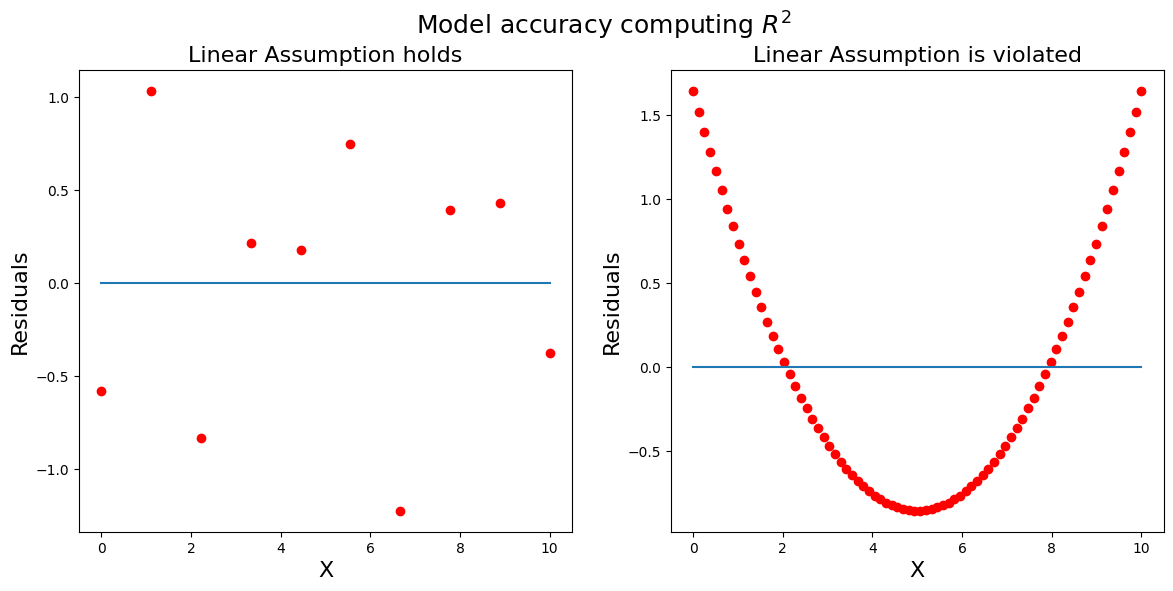

In [67]:
fontsize = 16
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
fig.suptitle('Model accuracy computing $R^2$', fontsize = fontsize+2)


ax1.scatter(x_vals, y_vals-results.predict(x_vals1), color = 'r')
ax1.plot(x_vals, 0*np.ones(x_vals.shape[0]))

ax1.set_xlabel('X', fontsize = fontsize)
ax1.set_ylabel('Residuals', fontsize = fontsize)
ax1.set_title('Linear Assumption holds', fontsize = fontsize)

ax2.scatter(x_vals_bad_example, y_vals_bad_exmaple-results1.predict(x_vals1_bad_example), color = 'r')
ax2.plot(x_vals_bad_example, 0*np.ones(x_vals_bad_example.shape[0]))

ax2.set_xlabel('X', fontsize = fontsize)
ax2.set_ylabel('Residuals', fontsize = fontsize)


# plt.xlabel('X', fontsize = 20)
# plt.ylabel('Y', fontsize = 20)
ax2.set_title('Linear Assumption is violated', fontsize = fontsize)
plt.show()

<div dir="rtl"> שני הגרפים למעלה מציגים לנו שגיאות של המודל. אינקדציה טובה לכך שהנחת הליניאריות מתקיימת היא כך שהשגיאות בצורה שרירותית לחלוטין מתחת לקו (כלומר קטנות מ-0) או מעל הקו (כלומר על הקו)

<div dir="rtl"> לפיכך הגרף השמאלי מציג תמונה שאכן הנחת הליניאריות מתקיימת ואילו בגרף הימני ההנחה לא מתקיימת.

### 2. Constant variability (homoscedasticity) שונות קבועה בשגיאה

In [68]:
y_vals_increasing_var = pkl.load(open('../pkl/y_vals_increasing_var.pkl', 'rb'))

In [69]:
num_points = 80
x_vals_homosc = np.linspace(0,10, num_points)

In [70]:
# Assuming X_train and y_train are your training data
x_vals_1_homosc = sm.add_constant(x_vals_homosc)  # Add a constant (intercept) term to the features
## If we don't add it, the intercept will be 0.
# Create a linear regression model
model2 = sm.OLS(y_vals_increasing_var, x_vals_1_homosc)
# Fit the model
results2 = model2.fit()
# Print summary statistics, including p-values for each coefficient
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     166.4
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           4.93e-21
Time:                        09:48:00   Log-Likelihood:                -316.90
No. Observations:                  80   AIC:                             637.8
Df Residuals:                      78   BIC:                             642.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0664      2.851      2.829      0.0

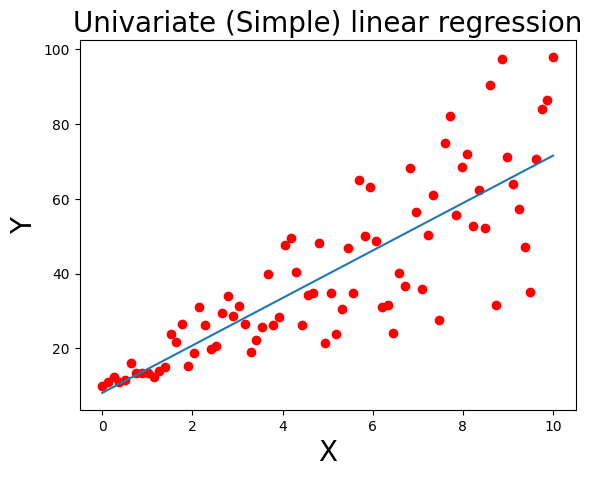

In [71]:
plt.figure()
plt.scatter(x_vals_homosc, y_vals_increasing_var, color = 'r')
plt.plot(x_vals_homosc, results2.predict(x_vals_1_homosc))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

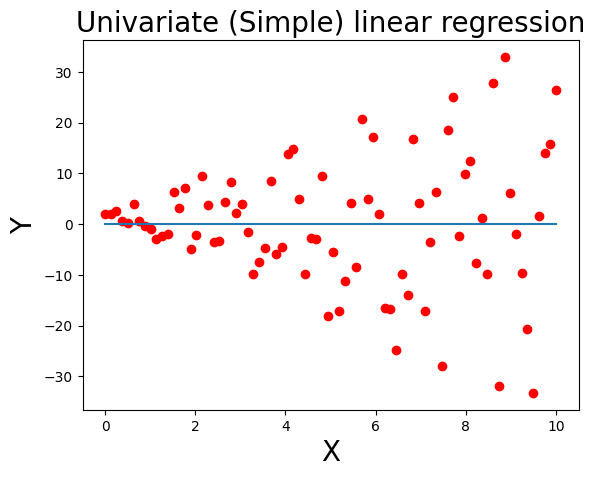

In [72]:
plt.figure()
plt.scatter(x_vals_homosc, y_vals_increasing_var - results2.predict(x_vals_1_homosc), color = 'r')
plt.plot(x_vals_homosc, np.zeros(x_vals_homosc.shape[0]))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl"> בגרף למעלה נראה שהשונות של השגיאה גדלה עם X.

In [73]:
y_vals_constant_var = pkl.load(open('../pkl/y_vals_constant_var.pkl', 'rb'))

In [74]:
# Create a linear regression model
model3 = sm.OLS(y_vals_constant_var, x_vals_1_homosc)
# Fit the model
results3 = model3.fit()
# Print summary statistics, including p-values for each coefficient
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     434.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.25e-33
Time:                        09:48:10   Log-Likelihood:                -192.37
No. Observations:                  80   AIC:                             388.7
Df Residuals:                      78   BIC:                             393.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3650      0.601     15.578      0.0

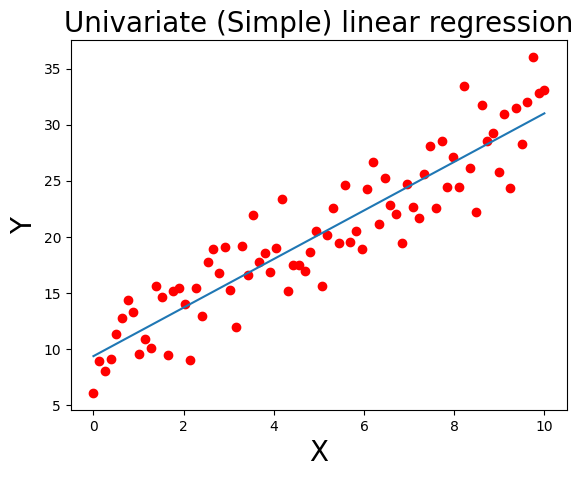

In [75]:
plt.figure()
plt.scatter(x_vals_homosc, y_vals_constant_var, color = 'r')
plt.plot(x_vals_homosc, results3.predict(x_vals_1_homosc))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

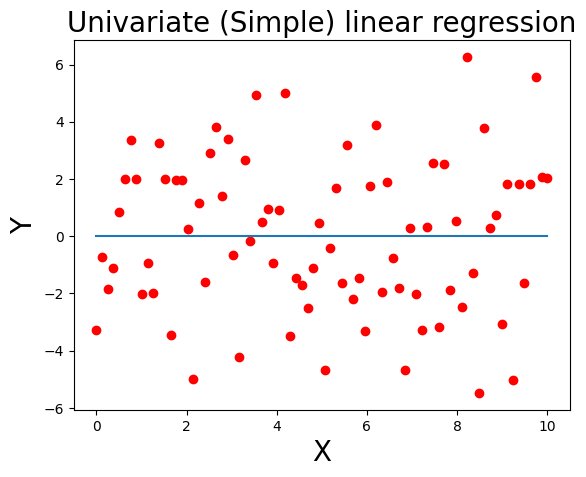

In [76]:
plt.figure()
plt.scatter(x_vals_homosc, y_vals_constant_var- results3.predict(x_vals_1_homosc), color = 'r')
plt.plot(x_vals_homosc, np.zeros(x_vals_1_homosc.shape[0]))
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.title('Univariate (Simple) linear regression', fontsize = 20)
plt.show()

<div dir="rtl"> בגרף למעלה נראה שהשונות של השגיאה קבועה עם X. 

### 3. Normal distributed errors התפלגות נורמלית של השגיאות

<div dir="rtl"> ההנחה הפחות חשובה מהשלושה. הנחה זו נבדוק ויזואלית על ידי הסטוגרמה של השגיאות.



In [77]:
## mean value of the errors
mean_val = (y_vals_constant_var-results3.predict(x_vals_1_homosc)).mean()
## standard deviation value of the errors
std_val = (y_vals_constant_var-results3.predict(x_vals_1_homosc)).std()

<div dir="rtl"> הסטוגרמה משמעותה הצגת התפלגות של הנתונים. נעשה זאת ע"י הפעולה plt.hist. 

<div dir="rtl"> הקלט של הפונקצייה מחלוק ל-3:
    1. הנתונים עצמם, 2. bins זה לכמה קבוצות מחלקים את הנתונים, 3. density = True בעצם אנחנו אומרים לפונקצייה להוציא לנו התפלגות חוקית

<div dir="rtl"> הסבר נחמד על הסטוגרמה ניתן למצוא כאן: 

https://www.youtube.com/watch?v=gSEYtAjuZ-Y

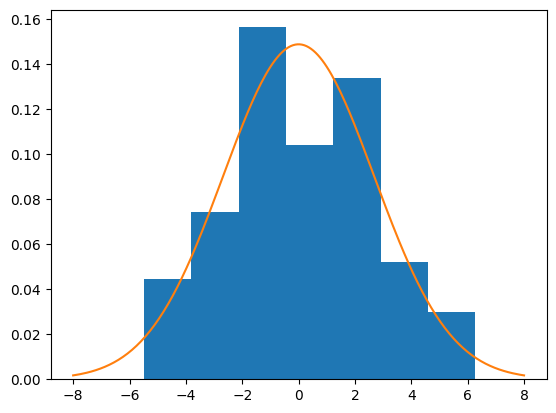

In [78]:
plt.figure()
plt.hist(y_vals_constant_var-results3.predict(x_vals_1_homosc), bins = 7, density = True)
plt.plot(np.linspace(-8,8, 200), scipy.stats.norm(mean_val, std_val).pdf(np.linspace(-8,8, 200)))
plt.show()